# David Ollech

## Research question/interests
# Updated for Milestone 3

**What is the relationship between smoking status, sex, region, and number of children in this dataset population?**

I am aiming to visualize various relationships that might exist between these variables.  

Here are a few interesting things that the data has begun to reveal.

1. In the dataset, there is a high frequency of people under the age of 20.  The mean age is 39, with the lowest being 18 and the highest being 64.
1. There is a correlation between a person's age and their likelihood to have children.  But when graphed out, we see that the 30-39 year old age group has the largest number of children and it decreases from there. The mean number of children for the dataset is 1.01.
1. There are far more smokers than non smokers in the data set.  On average, smokers have slightly more children. The most smokers are located in the southeast. Of the smokers, more men smoke than women.
1. The dataset is almost equally split among the four regions, but not quite.
1. The northeast has the largest average of children

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis
## 1. Understanding the Variables

In [2]:
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.shape

(1338, 7)

In [5]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [6]:
df.nunique(axis=0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.region.unique().tolist()

['southwest', 'southeast', 'northwest', 'northeast']

In [9]:
df.smoker.unique().tolist()


['yes', 'no']

In [10]:
df.sex.unique().tolist()

['female', 'male']

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
df.groupby('region')['children'].mean()

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64

In [15]:
df.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


## 2. Cleaning the data

In [16]:
df_drop = df.drop(columns=['bmi', 'charges'])
df_drop

,age,sex,children,smoker,region
0,19,female,0,yes,southwest
1,18,male,1,no,southeast
2,28,male,3,no,southeast
3,33,male,0,no,northwest
4,32,male,0,no,northwest
...,...,...,...,...,...
1333,50,male,3,no,northwest
1334,18,female,0,no,northeast
1335,18,female,0,no,southeast
1336,21,female,0,no,southwest


In [17]:
df_drop.isnull()

,age,sex,children,smoker,region
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1333,False,False,False,False,False
1334,False,False,False,False,False
1335,False,False,False,False,False
1336,False,False,False,False,False


In [18]:
df_drop.dropna(axis=0)

,age,sex,children,smoker,region
0,19,female,0,yes,southwest
1,18,male,1,no,southeast
2,28,male,3,no,southeast
3,33,male,0,no,northwest
4,32,male,0,no,northwest
...,...,...,...,...,...
1333,50,male,3,no,northwest
1334,18,female,0,no,northeast
1335,18,female,0,no,southeast
1336,21,female,0,no,southwest


In [19]:
df_drop.shape

(1338, 5)

## 3. Exploring relationships in the data

C:\Users\david\AppData\Local\Temp\ipykernel_39452\3619987536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_drop.corr()


<AxesSubplot:>

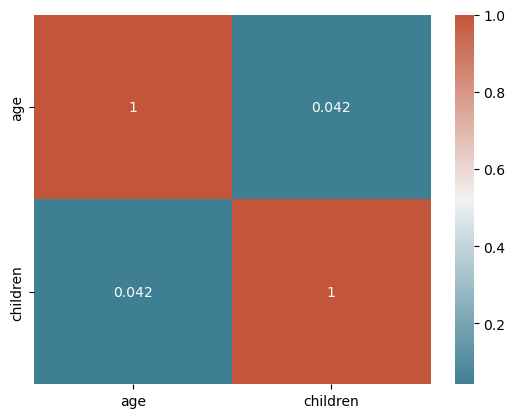

In [20]:
corr = df_drop.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

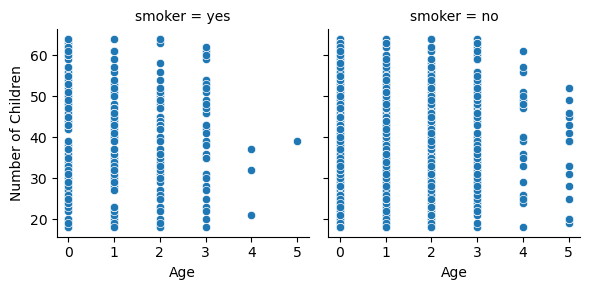

In [21]:
g = sns.FacetGrid(data=df_drop, col="smoker",col_wrap=2)
g.map(sns.scatterplot, "children", "age").set(ylabel="Number of Children",xlabel="Age")

In [22]:
df_groupby=df_drop.groupby('sex').mean().reset_index()
df_groupby

C:\Users\david\AppData\Local\Temp\ipykernel_39452\3307332774.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby=df_drop.groupby('sex').mean().reset_index()


,sex,age,children
0,female,39.503021,1.074018
1,male,38.917160,1.115385


In [23]:
df_groupby=df_drop.groupby('children').mean().reset_index()
df_groupby

C:\Users\david\AppData\Local\Temp\ipykernel_39452\3706586135.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby=df_drop.groupby('children').mean().reset_index()


,children,age
0,0,38.444251
1,1,39.453704
2,2,39.445833
3,3,41.566879
4,4,39.000000
5,5,35.611111


In [24]:
df_groupby=df_drop.groupby('age').mean().reset_index()
df_groupby

C:\Users\david\AppData\Local\Temp\ipykernel_39452\2308472880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby=df_drop.groupby('age').mean().reset_index()


,age,children
0,18,0.449275
1,19,0.426471
2,20,0.862069
3,21,0.785714
4,22,0.714286
5,23,1.000000
6,24,0.464286
7,25,1.285714
8,26,1.071429
9,27,0.964286


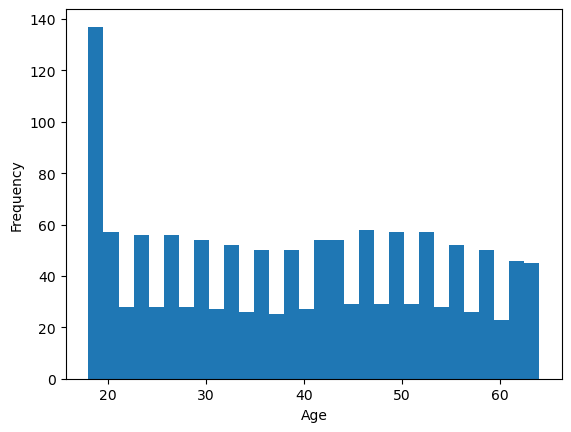

In [25]:
plt.hist(df['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

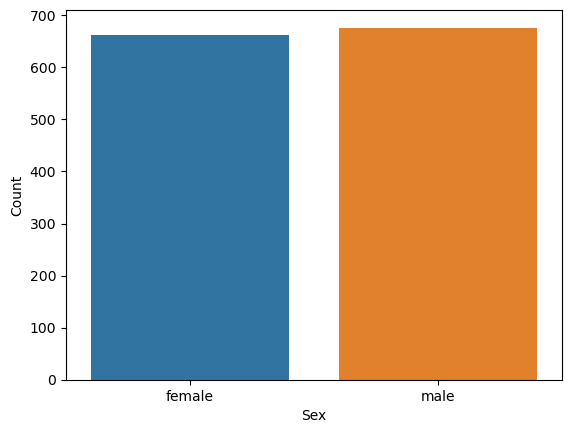

In [26]:
sns.countplot(x='sex', data=df_drop)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

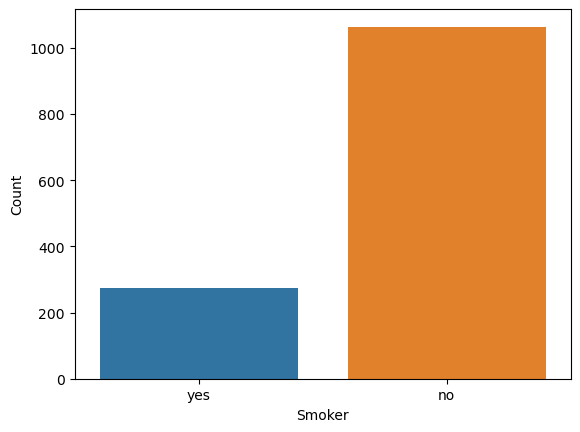

In [27]:
sns.countplot(x='smoker', data=df_drop)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

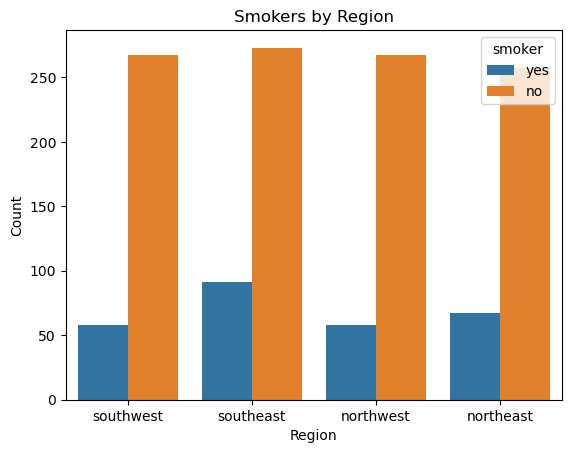

In [28]:
sns.countplot(x='region', hue='smoker', data=df_drop)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Smokers by Region')
plt.show()

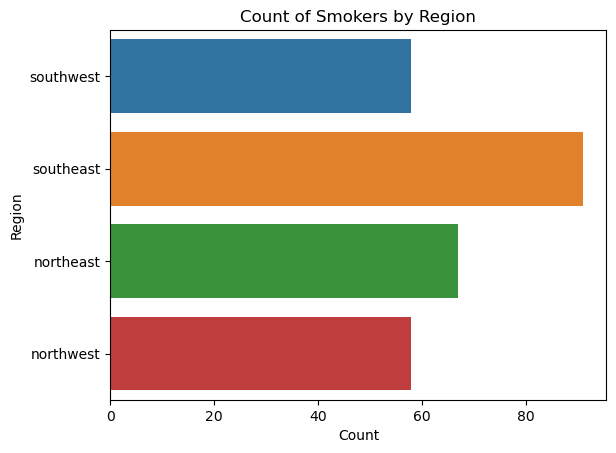

In [29]:
smokers = df_drop[df_drop['smoker'] == 'yes']
sns.countplot(y='region', data=smokers)
plt.title('Count of Smokers by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


In [30]:
smoker_children = df_drop.groupby('smoker')['children'].mean()
smoker_children

smoker
no     1.090226
yes    1.113139
Name: children, dtype: float64

Text(0.5, 1.0, 'Average Number of Children for Smokers and Non-Smokers')

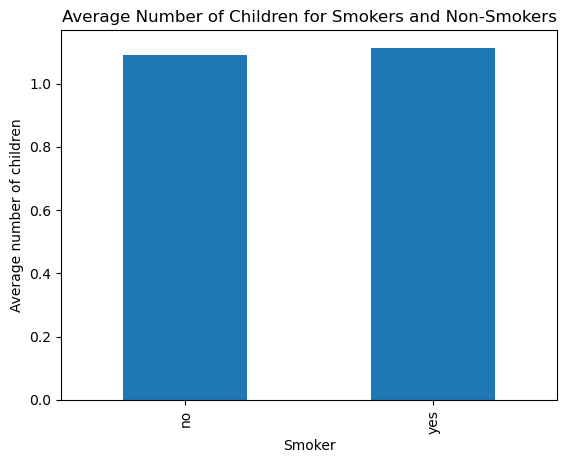

In [31]:
smoker_children.plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('Average number of children')
plt.title('Average Number of Children for Smokers and Non-Smokers')

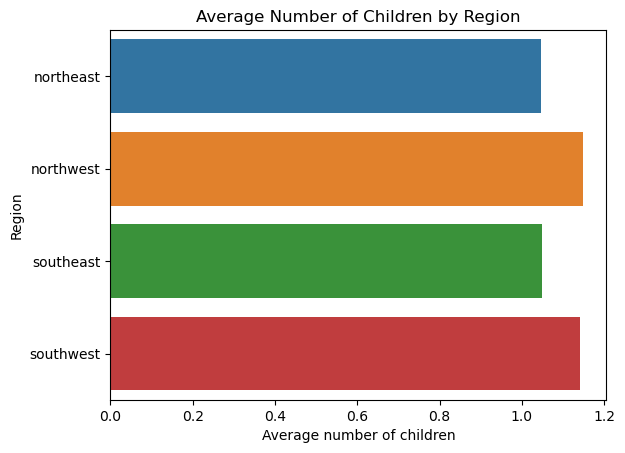

In [32]:
avg_children_by_region = df_drop.groupby('region')['children'].mean()
sns.barplot(x=avg_children_by_region.values, y=avg_children_by_region.index)
plt.xlabel('Average number of children')
plt.ylabel('Region')
plt.title('Average Number of Children by Region')
plt.show()

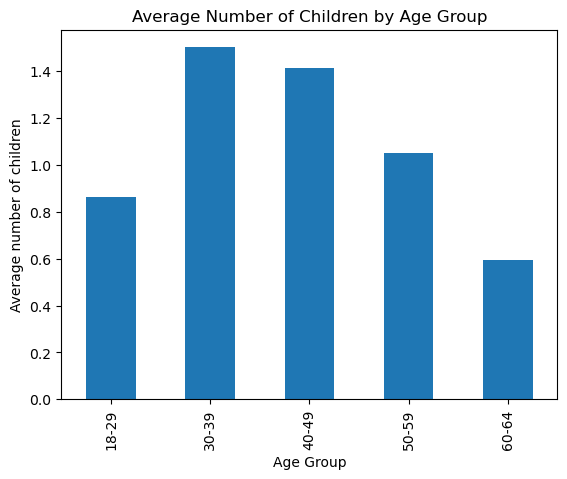

In [33]:

df_drop['age_group'] = pd.cut(df_drop['age'], bins=[18, 29, 39, 49, 59, 64], labels=['18-29', '30-39', '40-49', '50-59', '60-64'])
avg_children_by_age_group = df_drop.groupby('age_group')['children'].mean()

avg_children_by_age_group.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average number of children')
plt.title('Average Number of Children by Age Group')
plt.show()


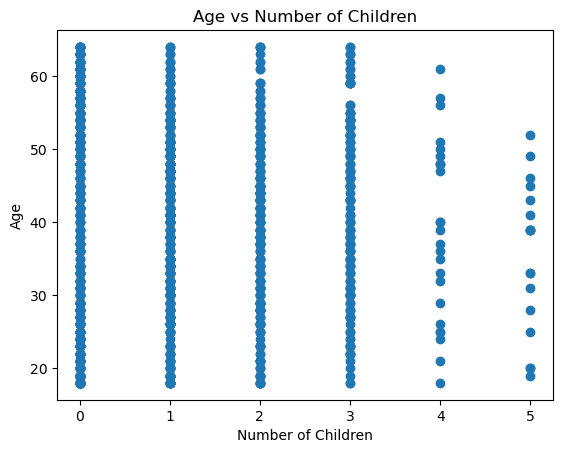

In [34]:
plt.scatter(df_drop['children'], df_drop['age'])
plt.xlabel('Number of Children')
plt.ylabel('Age')
plt.title('Age vs Number of Children')
plt.show()

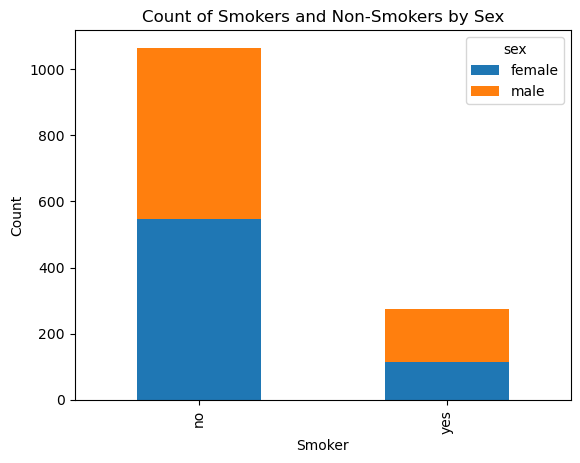

In [35]:
smoker_sex = pd.crosstab(df_drop['smoker'], df_drop['sex'])
smoker_sex.plot(kind='bar', stacked=True)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count of Smokers and Non-Smokers by Sex')
plt.show()

# MILESTONE 4

# Research question

**How does smoking affect a population's BMI as it ages?**

# Data Analysis Pipeline

## 1. Load Data

In [36]:
import pandas as pd 

In [37]:
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check file type and encoding

In [38]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
import chardet
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
file_path = "../data/raw/insurance.csv"
_, extension = os.path.splitext(file_path)
file_type = extension.lower()
f"File type: {file_type}"


'File type: .csv'

In [41]:
file_path = "../data/raw/insurance.csv"

with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())
file_encoding = result['encoding']
print(f"File encoding: {file_encoding}")



File encoding: ascii


### Check delimiters

In [42]:

sample_size = 1024
with open(file_path, 'r', newline='', encoding=file_encoding) as file:
    sample = file.read(sample_size)

sniffer = csv.Sniffer()
delimiter = sniffer.sniff(sample).delimiter
print(f"Delimiter: {delimiter}")



Delimiter: ,


### Skip rows

Running dropna does not remove any rows

In [43]:
df.shape

(1338, 7)

In [44]:
df.dropna(axis=0)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 2. Clean Data

### Drop unneeded columns
Drop the column "charges" as I am not using that in my analysis

In [45]:
dfdrop = df.drop(columns=['charges'])
dfdrop.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Check for incorrect data

Check for missing data

In [46]:
#There are no missing values

dfdrop.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Check datatypes

In [47]:
#The datatypes are ok

dfdrop.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

Check outliers

In [48]:
#no obvious outliers

dfdrop.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


Check unique values

In [49]:
#Everything here seems fine

dfdrop.nunique(axis=0)

age          47
sex           2
bmi         548
children      6
smoker        2
region        4
dtype: int64

## 2. Process and Wrangle Data

### Create any needed new column

In [50]:
#Added a column turning the presence of children into a binary status (yes or no).

dfdrop['has children'] = df['children'].apply(lambda x: 'yes' if x > 0 else 'no')
dfdrop

,age,sex,bmi,children,smoker,region,has children
0,19,female,27.900,0,yes,southwest,no
1,18,male,33.770,1,no,southeast,yes
2,28,male,33.000,3,no,southeast,yes
3,33,male,22.705,0,no,northwest,no
4,32,male,28.880,0,no,northwest,no
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,yes
1334,18,female,31.920,0,no,northeast,no
1335,18,female,36.850,0,no,southeast,no
1336,21,female,25.800,0,no,southwest,no


In [51]:
dfdrop['has children'].value_counts()

yes    764
no     574
Name: has children, dtype: int64

In [52]:


# Here I created a new column that classifies each row into one of the BMI categories.

def bmi_category(bmi):
    if bmi < 16:
        return 'underweight'
    elif 16 <= bmi <= 18.4:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'normal'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

dfdrop['BMI Category'] = dfdrop['bmi'].apply(lambda x: bmi_category(x))

dfdrop


,age,sex,bmi,children,smoker,region,has children,BMI Category
0,19,female,27.900,0,yes,southwest,no,overweight
1,18,male,33.770,1,no,southeast,yes,obese
2,28,male,33.000,3,no,southeast,yes,obese
3,33,male,22.705,0,no,northwest,no,normal
4,32,male,28.880,0,no,northwest,no,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,yes,obese
1334,18,female,31.920,0,no,northeast,no,obese
1335,18,female,36.850,0,no,southeast,no,obese
1336,21,female,25.800,0,no,southwest,no,overweight


In [53]:
dfdrop['BMI Category'].value_counts()

obese          719
overweight     377
normal         222
underweight     20
Name: BMI Category, dtype: int64

In [54]:
#As there are very few entries (20) for underweight people, I am going to remove this completely. 
#After printing the new dataset, I can see that 20 rows have been removed.

filtered_df = dfdrop[dfdrop['bmi'] >= 18.5]
filtered_df

,age,sex,bmi,children,smoker,region,has children,BMI Category
0,19,female,27.900,0,yes,southwest,no,overweight
1,18,male,33.770,1,no,southeast,yes,obese
2,28,male,33.000,3,no,southeast,yes,obese
3,33,male,22.705,0,no,northwest,no,normal
4,32,male,28.880,0,no,northwest,no,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,yes,obese
1334,18,female,31.920,0,no,northeast,no,obese
1335,18,female,36.850,0,no,southeast,no,obese
1336,21,female,25.800,0,no,southwest,no,overweight


In [55]:
#I now confirm the underweight category no longer exists.

filtered_df['BMI Category'].value_counts()

obese         719
overweight    377
normal        222
Name: BMI Category, dtype: int64

In [56]:
# Here I created a new column that classifies the entries into age groups

def age_category(age):
    if age < 19:
        return 'teens'
    elif 20 <= age <= 29:
        return '20s'
    elif 30 <= age <= 39:
        return '30s'
    elif 40 <= age <= 49:
        return '40s'
    elif 50 <= age <= 59:
        return '50s'  
    else:
        return '60s'

filtered_df['age group'] = filtered_df['age'].apply(lambda x: age_category(x))

filtered_df.head()

C:\Users\david\AppData\Local\Temp\ipykernel_39452\2805968598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age group'] = filtered_df['age'].apply(lambda x: age_category(x))


,age,sex,bmi,children,smoker,region,has children,BMI Category,age group
0,19,female,27.900,0,yes,southwest,no,overweight,60s
1,18,male,33.770,1,no,southeast,yes,obese,teens
2,28,male,33.000,3,no,southeast,yes,obese,20s
3,33,male,22.705,0,no,northwest,no,normal,30s
4,32,male,28.880,0,no,northwest,no,overweight,30s


In [57]:
filtered_df['age group'].value_counts()

40s      279
20s      273
50s      268
30s      252
60s      179
teens     67
Name: age group, dtype: int64

In [58]:
#here I re-arranged the order of the columns

new_order = ['age group', 'age', 'sex', 'children', 'has children', 'smoker', 'region', 'bmi', 'BMI Category']
filtered_df = filtered_df.reindex(columns=new_order)
filtered_df

,age group,age,sex,children,has children,smoker,region,bmi,BMI Category
0,60s,19,female,0,no,yes,southwest,27.900,overweight
1,teens,18,male,1,yes,no,southeast,33.770,obese
2,20s,28,male,3,yes,no,southeast,33.000,obese
3,30s,33,male,0,no,no,northwest,22.705,normal
4,30s,32,male,0,no,no,northwest,28.880,overweight
...,...,...,...,...,...,...,...,...,...
1333,50s,50,male,3,yes,no,northwest,30.970,obese
1334,teens,18,female,0,no,no,northeast,31.920,obese
1335,teens,18,female,0,no,no,southeast,36.850,obese
1336,20s,21,female,0,no,no,southwest,25.800,overweight


In [59]:

#Here I renamed the column "sex" to "gender"

filtered_df = filtered_df.rename(columns={"sex": "gender"})
filtered_df

,age group,age,gender,children,has children,smoker,region,bmi,BMI Category
0,60s,19,female,0,no,yes,southwest,27.900,overweight
1,teens,18,male,1,yes,no,southeast,33.770,obese
2,20s,28,male,3,yes,no,southeast,33.000,obese
3,30s,33,male,0,no,no,northwest,22.705,normal
4,30s,32,male,0,no,no,northwest,28.880,overweight
...,...,...,...,...,...,...,...,...,...
1333,50s,50,male,3,yes,no,northwest,30.970,obese
1334,teens,18,female,0,no,no,northeast,31.920,obese
1335,teens,18,female,0,no,no,southeast,36.850,obese
1336,20s,21,female,0,no,no,southwest,25.800,overweight


In [60]:
#Here I have sorted the data based on BMI Category, and reset the index

filtered_df.sort_values('BMI Category', ascending=True).reset_index(drop=True)

,age group,age,gender,children,has children,smoker,region,bmi,BMI Category
0,40s,46,female,2,yes,no,northwest,19.950,normal
1,60s,19,female,0,no,no,northwest,22.515,normal
2,teens,18,female,0,no,yes,northeast,21.660,normal
3,50s,55,male,1,yes,no,southwest,21.500,normal
4,40s,43,female,2,yes,yes,northeast,20.045,normal
...,...,...,...,...,...,...,...,...,...
1313,20s,21,male,0,no,no,northeast,27.360,overweight
1314,30s,34,female,1,yes,no,northwest,26.410,overweight
1315,40s,47,female,1,yes,no,northwest,29.545,overweight
1316,30s,36,male,3,yes,no,northeast,28.880,overweight


In [61]:
#Capitalize the column headers

filtered_df = filtered_df.rename(columns={'age group':'Age Group', 'age':'Age','gender':'Gender','bmi':'BMI','children':'Children','region':'Region', 'smoker':'Smoker', 'has children':'Has Children'})
filtered_df

,Age Group,Age,Gender,Children,Has Children,Smoker,Region,BMI,BMI Category
0,60s,19,female,0,no,yes,southwest,27.900,overweight
1,teens,18,male,1,yes,no,southeast,33.770,obese
2,20s,28,male,3,yes,no,southeast,33.000,obese
3,30s,33,male,0,no,no,northwest,22.705,normal
4,30s,32,male,0,no,no,northwest,28.880,overweight
...,...,...,...,...,...,...,...,...,...
1333,50s,50,male,3,yes,no,northwest,30.970,obese
1334,teens,18,female,0,no,no,northeast,31.920,obese
1335,teens,18,female,0,no,no,southeast,36.850,obese
1336,20s,21,female,0,no,no,southwest,25.800,overweight


In [62]:
filtered_df.to_csv('analysis_pipeline.csv', index=False)

In [63]:

#To answer my research question, I want to know what effect smoking has on the BMI of women with children.  Here I wrangle the data so that I can see the min and max value of Children for women who smoke.

confirm_children = filtered_df[(filtered_df['Gender'] == 'female') & (filtered_df['Smoker'] == 'yes')]
confirm_children.describe()

,Age,Children,BMI
count,111.000000,111.000000,111.000000
mean,38.882883,0.945946,30.033649
std,14.364564,1.077352,6.384783
min,18.000000,0.000000,19.095000
25%,26.000000,0.000000,25.080000
50%,40.000000,1.000000,28.880000
75%,49.500000,2.000000,34.650000
max,64.000000,3.000000,47.600000


# Task 2

In [99]:
    def bmi_category(bmi):
        if bmi < 16:
            return 'underweight'
        elif 16 <= bmi <= 18.4:
            return 'underweight'
        elif 18.5 <= bmi <= 24.9:
            return 'normal'
        elif 25 <= bmi <= 29.9:
            return 'overweight'
        else:
            return 'obese'

    
    def age_category(age):
        if age < 19:
            return 'teen'
        elif 20 <= age <= 29:
            return '20s'
        elif 30 <= age <= 39:
            return '30s'
        elif 40 <= age <= 49:
            return '40s'
        elif 50 <= age <= 59:
            return '50s'  
        else:
            return '60s'

    new_order = ['age_group', 'age', 'sex', 'children', 'has_children', 'smoker', 'region', 'bmi', 'BMI_Category']
    
    df1 = (
        pd.read_csv("../data/raw/insurance.csv")
        .drop(columns=['charges'])
        .assign(has_children=lambda x: x['children'].apply(lambda c: 'yes' if c > 0 else 'no'))
        .assign(BMI_Category=lambda x: x['bmi'].apply(bmi_category))
        .loc[lambda x: x['bmi'] >= 18.5]
    )
    
    df2 = (
        df1
        .assign(age_group=lambda x: x['age'].apply(age_category))
        .pipe(lambda x: x.reindex(columns=new_order))
        .rename(columns={'age_group':'Age Group', 'age':'Age','sex':'Gender','bmi':'BMI','children':'Children','region':'Region', 'smoker':'Smoker', 'has_children':'Has Children', 'BMI_Category':'BMI Category'})
        .sort_values('BMI Category', ascending=True)
        .reset_index(drop=True)
    )
    
    df2.head()

,Age Group,Age,Gender,Children,Has Children,Smoker,Region,BMI,BMI Category
0,40s,46,female,2,yes,no,northwest,19.950,normal
1,60s,19,female,0,no,no,northwest,22.515,normal
2,teen,18,female,0,no,yes,northeast,21.660,normal
3,50s,55,male,1,yes,no,southwest,21.500,normal
4,40s,43,female,2,yes,yes,northeast,20.045,normal


In [100]:
def load_and_process(url_or_path_to_csv_file):
   
    def bmi_category(bmi):
        if bmi < 16:
            return 'underweight'
        elif 16 <= bmi <= 18.4:
            return 'underweight'
        elif 18.5 <= bmi <= 24.9:
            return 'normal'
        elif 25 <= bmi <= 29.9:
            return 'overweight'
        else:
            return 'obese'

    
    def age_category(age):
        if age < 19:
            return 'teen'
        elif 20 <= age <= 29:
            return '20s'
        elif 30 <= age <= 39:
            return '30s'
        elif 40 <= age <= 49:
            return '40s'
        elif 50 <= age <= 59:
            return '50s'  
        else:
            return '60s'

    new_order = ['age_group', 'age', 'sex', 'children', 'has_children', 'smoker', 'region', 'bmi', 'BMI_Category']
    
    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .drop(columns=['charges'])
        .assign(has_children=lambda x: x['children'].apply(lambda c: 'yes' if c > 0 else 'no'))
        .assign(BMI_Category=lambda x: x['bmi'].apply(bmi_category))
        .loc[lambda x: x['bmi'] >= 18.5]
    )
    
    df2 = (
        df1
        .assign(age_group=lambda x: x['age'].apply(age_category))
        .pipe(lambda x: x.reindex(columns=new_order))
        .rename(columns={'age_group':'Age Group', 'age':'Age','sex':'Gender','bmi':'BMI','children':'Children','region':'Region', 'smoker':'Smoker', 'has_children':'Has Children', 'BMI_Category':'BMI Category'})
        .sort_values('BMI Category', ascending=True)
        .reset_index(drop=True)
    )

    return df2


data = load_and_process("../data/raw/insurance.csv")
data.head()

,Age Group,Age,Gender,Children,Has Children,Smoker,Region,BMI,BMI Category
0,40s,46,female,2,yes,no,northwest,19.950,normal
1,60s,19,female,0,no,no,northwest,22.515,normal
2,teen,18,female,0,no,yes,northeast,21.660,normal
3,50s,55,male,1,yes,no,southwest,21.500,normal
4,40s,43,female,2,yes,yes,northeast,20.045,normal


# Task 3
## Analysis

I begin my analysis by getting a count of the incidences in the population of each BMI category, filtered by non-smokers.  I am able to detect a pattern that as people get older, the rate of obesity increases and the "normal weight" value decreases. 

Text(0.5, 1.03, 'Frequency of BMI Category by Age Group (Non-Smokers)')

<Figure size 1000x600 with 0 Axes>

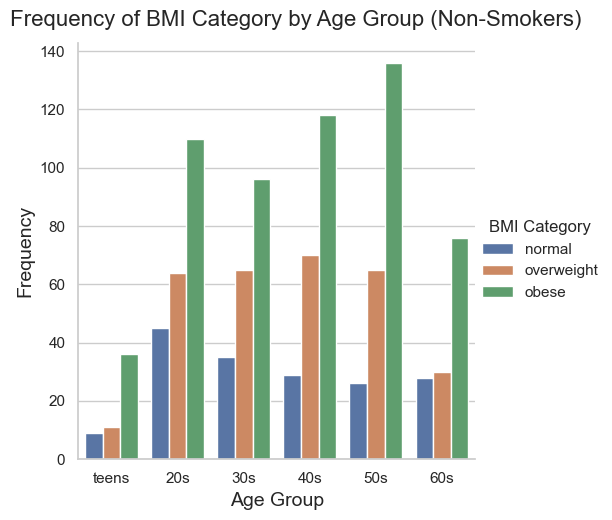

In [64]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

smokers_df = filtered_df[filtered_df['Smoker'] == 'no']
age_order = ['teens', '20s', '30s', '40s', '50s', '60s']
bmi_order = ['normal', 'overweight', 'obese']

plot = sns.catplot(x='Age Group', 
                   hue='BMI Category', 
                   hue_order=bmi_order,
                   data=smokers_df, 
                   kind='count', 
                   order=age_order)

plot.set_axis_labels('Age Group', 'Frequency', fontsize=14)
plot.fig.suptitle('Frequency of BMI Category by Age Group (Non-Smokers)', fontsize=16, y=1.03)

This pattern seems to mostly hold true in three out of the four regions in the United States.  The Southeast region is an outlier.

Text(0.5, 1.03, 'Frequency of BMI Category by Age Group by Geographic Region (Non-Smokers)')

<Figure size 1000x600 with 0 Axes>

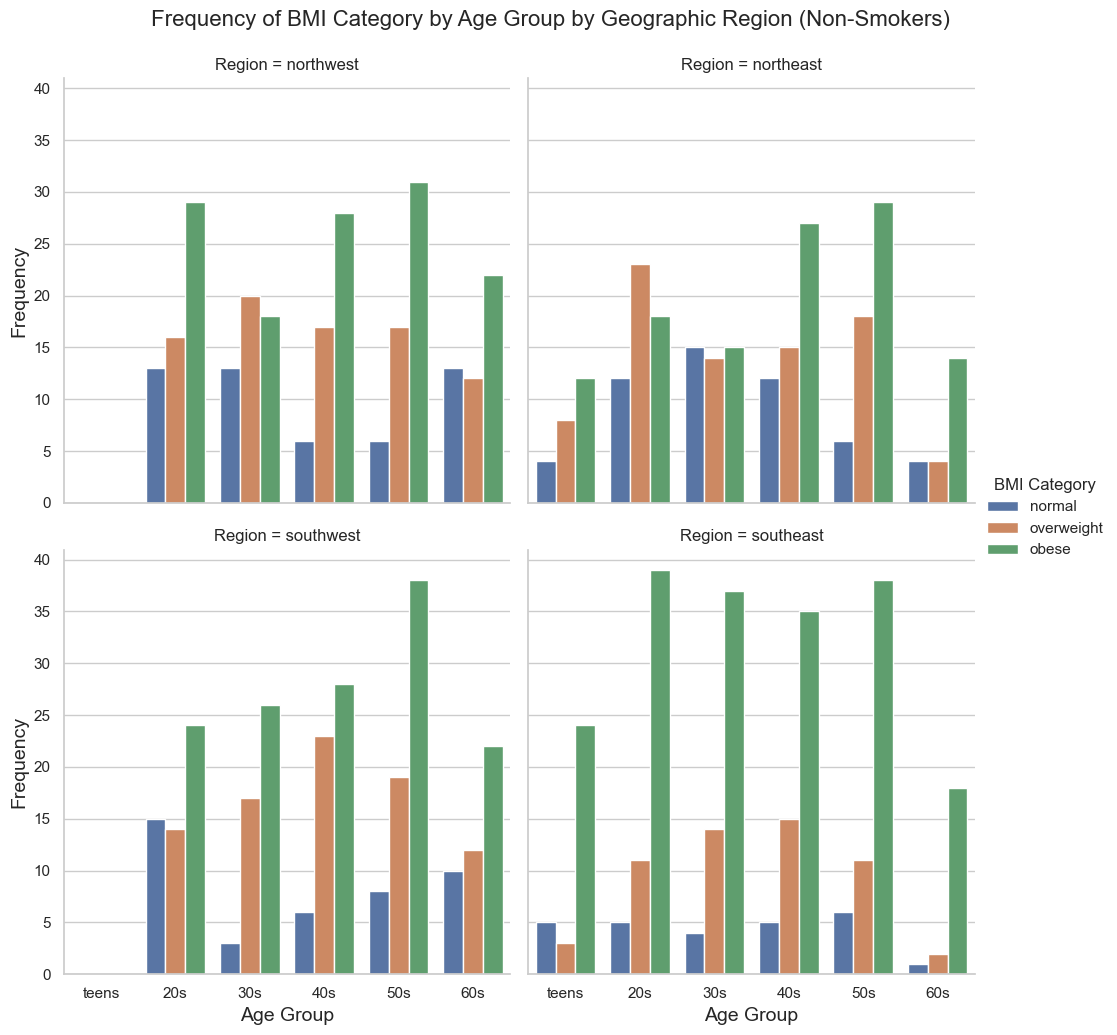

In [65]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
smokers_df = filtered_df[filtered_df['Smoker'] == 'no']
age_order = ['teens', '20s', '30s', '40s', '50s', '60s']
bmi_order = ['normal', 'overweight', 'obese']
region_order = ['northwest', 'northeast', 'southwest', 'southeast']

plot = sns.catplot(x='Age Group', 
                   hue='BMI Category', 
                   data=smokers_df, 
                   kind='count', 
                   order=age_order, 
                   hue_order=bmi_order,
                   col='Region',
                   col_order=region_order,
                   col_wrap=2)

plot.set_xlabels('Age Group', fontsize=14)
plot.set_ylabels('Frequency', fontsize=14)
plot.fig.suptitle('Frequency of BMI Category by Age Group by Geographic Region (Non-Smokers)', fontsize=16, y=1.03)


If we use the same visualization but now filter it for smokers, we see that BMI's stay more steady as the population ages.

Text(0.5, 1.03, 'Frequency of BMI Category by Age Group by Geographic Region (Smokers)')

<Figure size 1000x600 with 0 Axes>

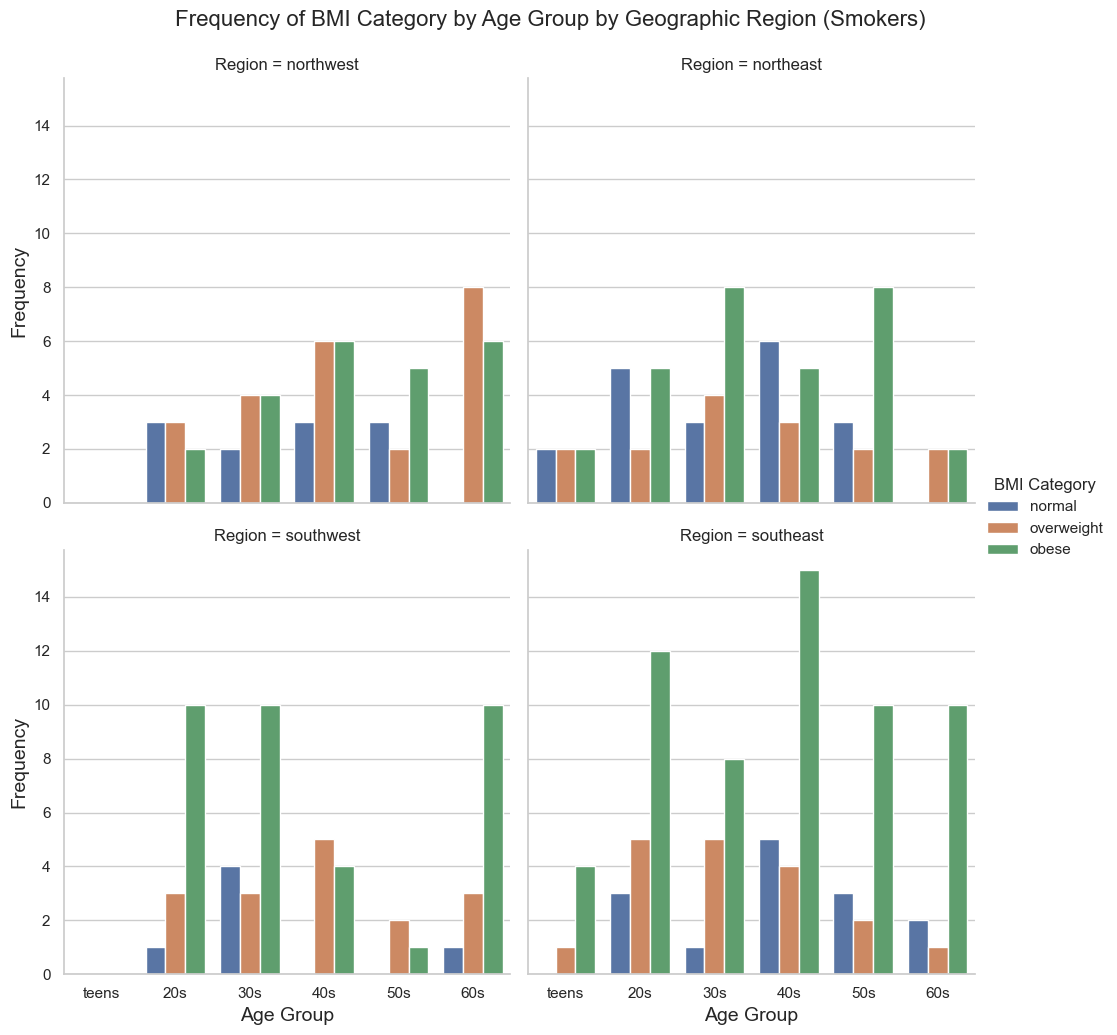

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
smokers_df = filtered_df[filtered_df['Smoker'] == 'yes']

age_order = ['teens', '20s', '30s', '40s', '50s', '60s']
bmi_order = ['normal', 'overweight', 'obese']
region_order = ['northwest', 'northeast', 'southwest', 'southeast']

plot = sns.catplot(x='Age Group', 
                   hue='BMI Category', 
                   data=smokers_df, 
                   kind='count', 
                   order=age_order, 
                   hue_order=bmi_order,
                   col='Region',
                   col_order=region_order,
                   col_wrap=2)

plot.set_xlabels('Age Group', fontsize=14)
plot.set_ylabels('Frequency', fontsize=14)
plot.fig.suptitle('Frequency of BMI Category by Age Group by Geographic Region (Smokers)', fontsize=16, y=1.03)

Next I wanted to plot the datapoints for age and BMI on a jointplot to see if I could detect a correlation. From this sample, we can see that there is a slight trend that shows that an individual's BMI will increase as they get older.


Text(0.5, 1.03, 'Age vs. BMI of Entire Population')

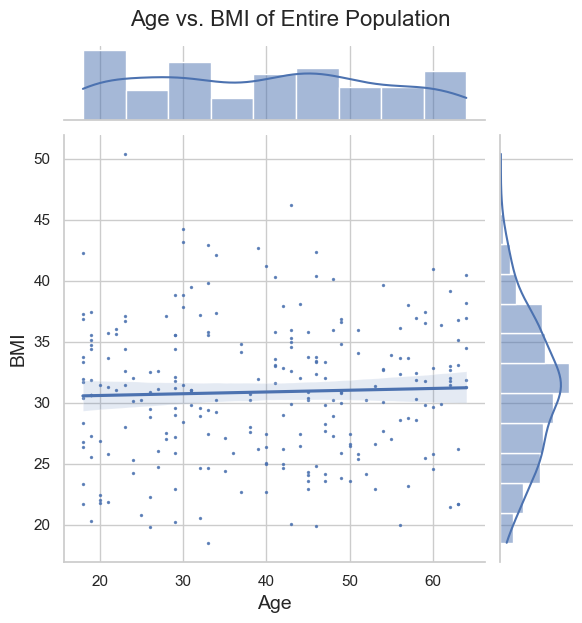

In [67]:
sampled_data = filtered_df.sample(n=250)  

plot = sns.jointplot(x='Age',
                     y='BMI', 
                     data=sampled_data, 
                     kind='reg', 
                     scatter_kws={'s': 2})


plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Entire Population', fontsize=16, y=1.03)

I wanted to next see if there is any difference between smokers and non-smokers.  First we look at non-smokers and see that the trend of the previous graph holds true: BMI increases with age

Text(0.5, 1.03, 'Age vs. BMI of Non-Smokers')

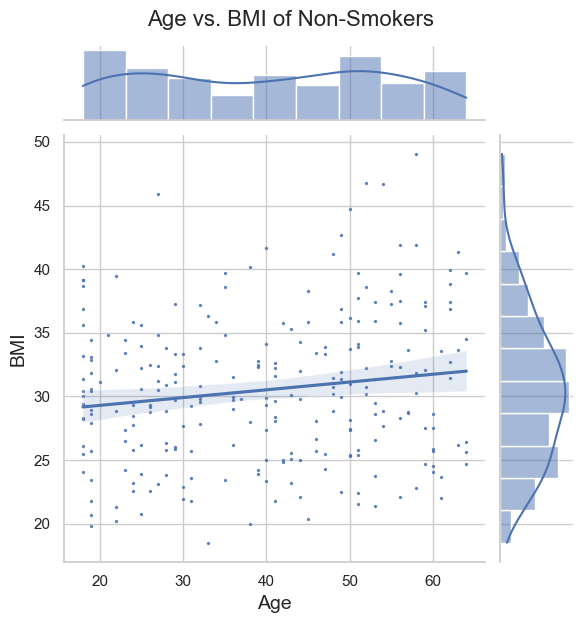

In [68]:

 
smokers_df = filtered_df[filtered_df['Smoker'] == 'no']
sampled_data = smokers_df.sample(n=250) 
plot = sns.jointplot(x='Age',
                         y='BMI', 
                         data=sampled_data, 
                         kind='reg', 
                         scatter_kws={'s': 2})


plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Non-Smokers', fontsize=16, y=1.03)


Next I filtered by smokers, and the resulting graph shows that the trend is noticeably reduced.  It seems that smoking helps an individual keep their weight steady as they age.

Text(0.5, 1.03, 'Age vs. BMI for Smokers')

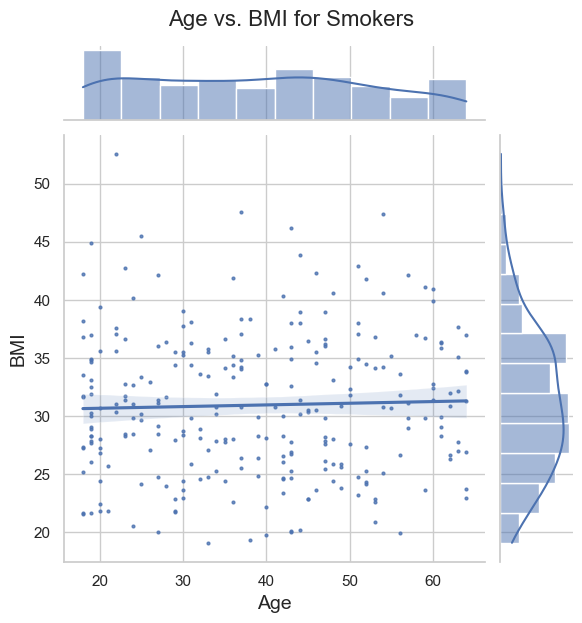

In [82]:
# A joint plot showing age vs bmi for smokers 

smokers_df = filtered_df[filtered_df['Smoker'] == 'yes']

plot = sns.jointplot(x='Age', 
                     y='BMI', 
                     data=smokers_df, 
                     kind='reg', 
                     scatter_kws={'s': 4})

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI for Smokers', fontsize=16, y=1.03)

Now let's isolate out gender.  First, let's look at males who do not smoke.  The trend continues that as age increases, so does BMI.

Text(0.5, 1.03, 'Age vs. BMI of Males (Non-Smokers)')

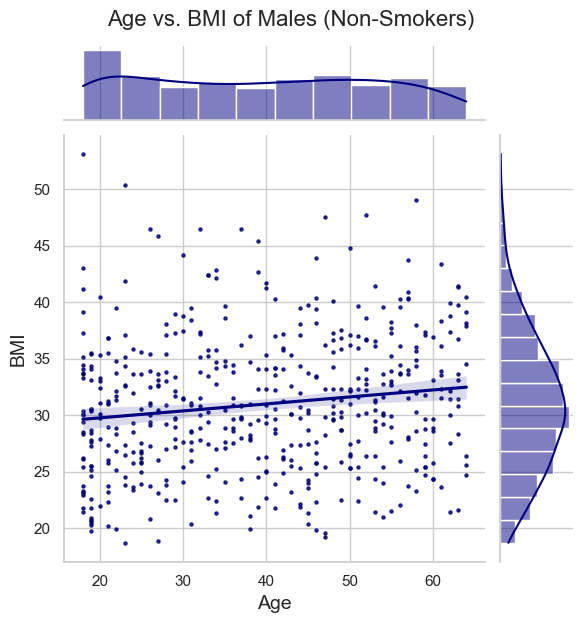

In [83]:
#non-smokers who are male

male_smokers_df = filtered_df[(filtered_df['Smoker'] == 'no') & (filtered_df['Gender'] == 'male')]

plot = sns.jointplot(x='Age', 
               y='BMI', 
               data=male_smokers_df, 
               kind='reg', 
               scatter_kws={'s': 5}, 
               color='navy')

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Males (Non-Smokers)', fontsize=16, y=1.03)




But for males who smoke, we see that the trend line is flat, if not decreasing!

Text(0.5, 1.03, 'Age vs. BMI of Males (Smokers)')

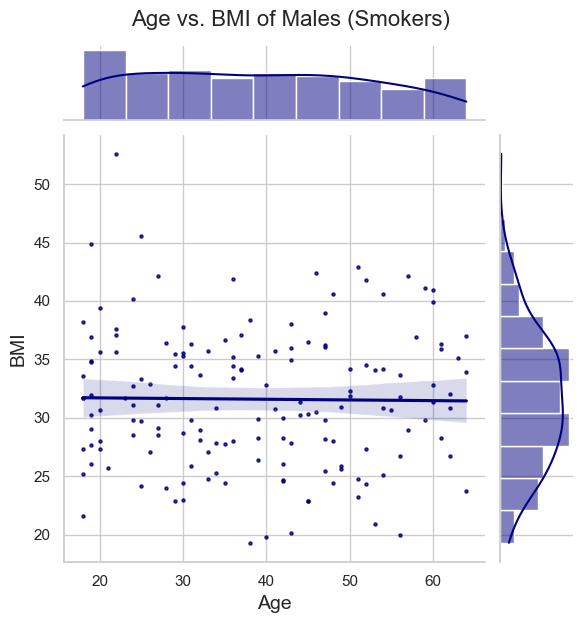

In [84]:
#smokers who are male

male_smokers_df = filtered_df[(filtered_df['Smoker'] == 'yes') & (filtered_df['Gender'] == 'male')]

plot = sns.jointplot(x='Age', 
               y='BMI', 
               data=male_smokers_df, 
               kind='reg', 
               scatter_kws={'s': 5}, 
               color='navy')

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Males (Smokers)', fontsize=16, y=1.03)




Next we filter for smokers who are female.  Interestingly, we see that smoking in the female population does not have the same effect as in the male population, and women tend to increase in BMI as they age despite smoking.

Text(0.5, 1.03, 'Age vs. BMI for Females (Smokers)')

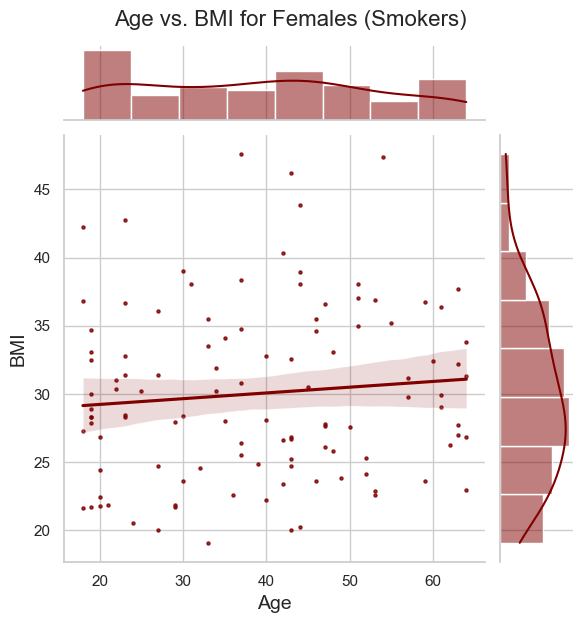

In [85]:
#smokers who are female

female_smokers_df = filtered_df[(filtered_df['Smoker'] == 'yes') & (filtered_df['Gender'] == 'female')]

plot = sns.jointplot(x='Age', 
              y='BMI', 
              data=female_smokers_df, 
              kind='reg', 
              scatter_kws={'s': 5}, 
              color='maroon')

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI for Females (Smokers)', fontsize=16, y=1.03)

I had a hunch that the number of children may be responsible for this increase in BMI.  Here we can see that indeed the BMI of a female individual tends to increase with the number of children.

Text(92.25, 0.5, 'Number of Children')

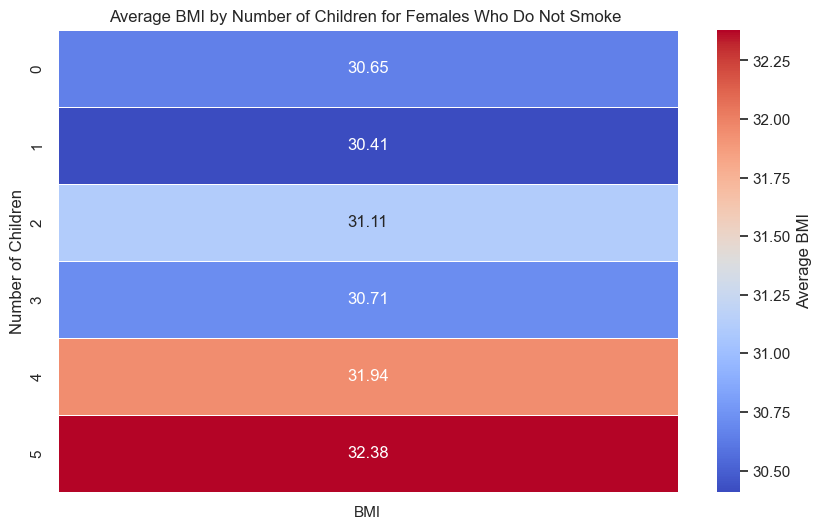

In [72]:

filtered_data = filtered_df[(filtered_df['Smoker'] == 'no') & (filtered_df['Gender'] == 'female')]

grouped_data = filtered_data.groupby(['Children'])['BMI'].mean().reset_index()
pivot_data = grouped_data.pivot_table(values='BMI', index='Children')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Average BMI'})


plt.title('Average BMI by Number of Children for Females Who Do Not Smoke ')
plt.ylabel('Number of Children')


However, even when we compare plot females based on number of children, so that we can compare smokers vs. non-smokers based on number of children, we still see female BMI tends to increase with age, regardless of whether they smoke or not.

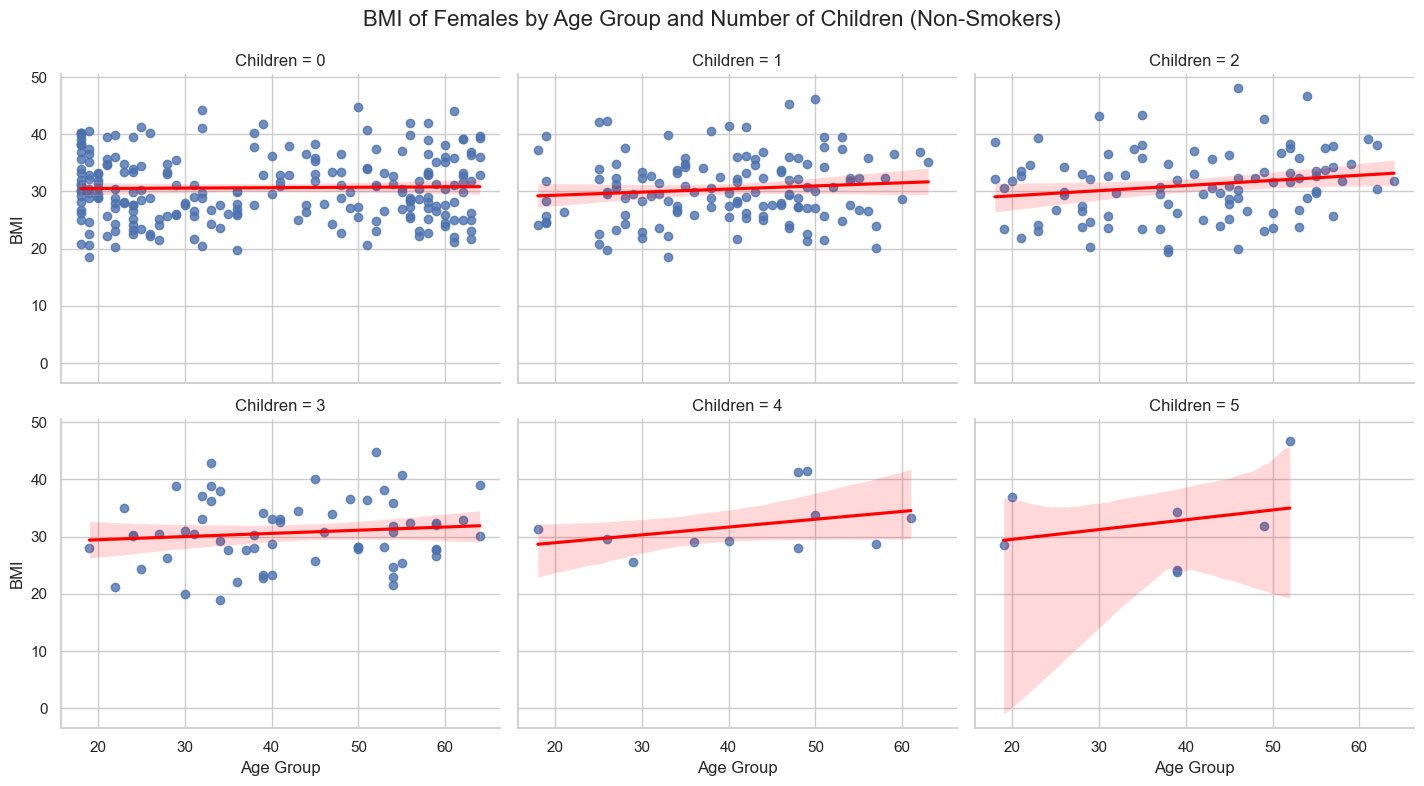

In [87]:

# Assuming your data is in a Pandas DataFrame called 'filtered_df'
female = filtered_df[(filtered_df['Gender'] == 'female') & (filtered_df['Smoker'] == 'no')]

sns.set(style="whitegrid")

# Create FacetGrid
g = sns.FacetGrid(female, col="Children", col_wrap=3, height=4, aspect=1.2)

# Map regplot (scatterplot with regression line) onto FacetGrid
g.map(sns.regplot, "Age", "BMI", line_kws={'color': 'red'})

# Set axis labels and title
g.set_axis_labels("Age Group", "BMI")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("BMI of Females by Age Group and Number of Children (Non-Smokers)", fontsize=16)

plt.show()



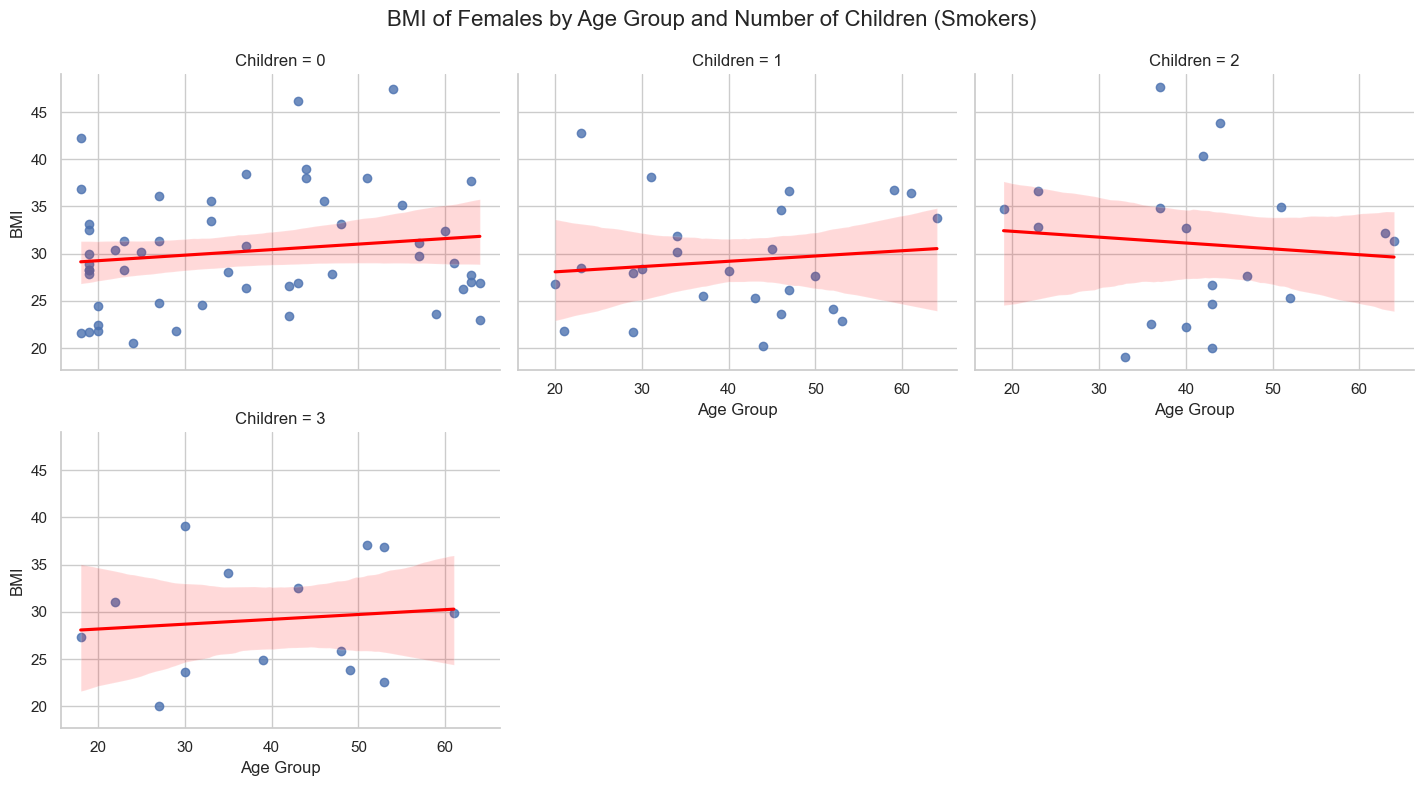

In [86]:

# Assuming your data is in a Pandas DataFrame called 'filtered_df'
female = filtered_df[(filtered_df['Gender'] == 'female') & (filtered_df['Smoker'] == 'yes')]

sns.set(style="whitegrid")

# Create FacetGrid
g = sns.FacetGrid(female, col="Children", col_wrap=3, height=4, aspect=1.2)

# Map regplot (scatterplot with regression line) onto FacetGrid
g.map(sns.regplot, "Age", "BMI", line_kws={'color': 'red'})

# Set axis labels and title
g.set_axis_labels("Age Group", "BMI")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("BMI of Females by Age Group and Number of Children (Smokers)", fontsize=16)

plt.show()


## Conclusion

1. When looking at the overall population, for non-smokers, there is a correlation between BMI increasing with age. However, the data seems to suggest that smoking negates this effect, and smokers maintain a steady BMI as they age (neither increasing or decreasing).  
2. When broken down by gender, we see that this phenemonen by and largely only affects men.  Men who smoke maintain steady BMI as they age, suggesting that smoking prevents an increase in weight gain as a man ages.
3. Women, on the other hand, tend to gain weight as they age regardless of whether or not they smoke and irregardless of how many children they have, though the increase is smaller than in women who smoke.  When comparing average BMIs of women with childen, we see that smokers have a lower overall BMI.

Answer: Overall, smoking appears to help a population maintain a steady BMI as the population ages.  Men who smoke tend not to gain weight as they age, compared to men who do not smoke.  Women who smoke do still gain weight, but still maintain a lower BMI overall than non-smokers.